## Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\KARTIK NEGI\Desktop\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.shape

(30, 17)

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [10]:
## to find the missing or null values in the features
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

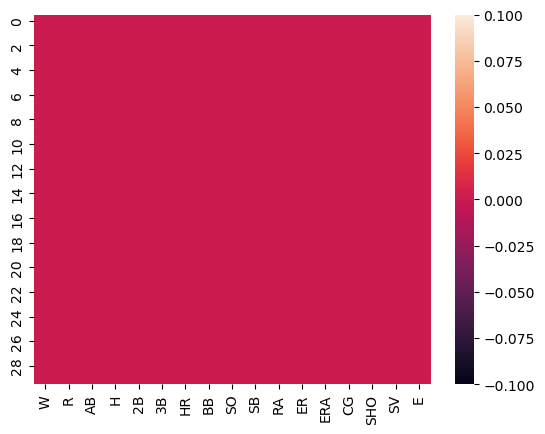

In [11]:
sns.heatmap(df.isnull())

## By using heatmap and non graphical methods we have observed that their are no null values present in the data.

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [13]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

# As we can see from the analysis above that this is a regression problem as there are more than 25 unique values in almost 13 features. Our dependent variable/Target also have 24 unique numerical values.
## Also the difference between no. of unique values and no. of rows is less therefore we can say that the problem is regression

# BUT WE HAVE FOUND THAT SOME FEATURES LIKE "CG","SHO" CONTAINS THE CATEGORICAL DATA SO THEREFORE THESE TWO COLUMNS HAVE CATEGORICAL DATA BECAUSE HERE THE NO OF UNIQUE VALUES ARE VERY LESS AND THE DIFFERENCE BETWEEN UNIQUE VALUES AND THE NO. OF ROWS IN THOSE COLUMNS IS VERY HIGH.

# DATA VISUALIZATION

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


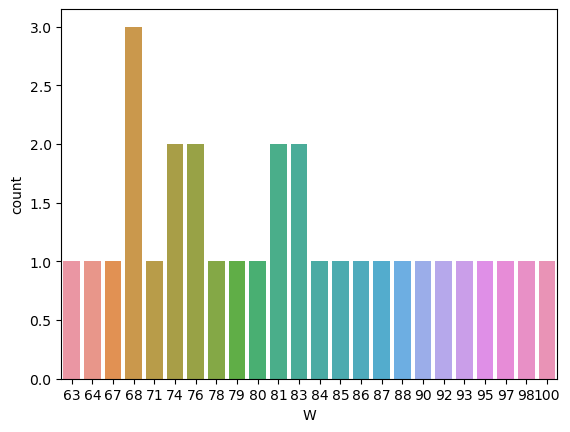

In [14]:
ax=sns.countplot(x='W',data=df)
print(df['W'].value_counts())

In [15]:
plt.figure(figsize=(100,150),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=17:
        ax=plt.subplot(8,3,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=20)
        plt.ylabel(col, fontsize=20)
        plt.yticks(rotation=0,fontsize=30)
    plotnumber+=1
plt.show()

## This is called as distribution plot to know about the distribution

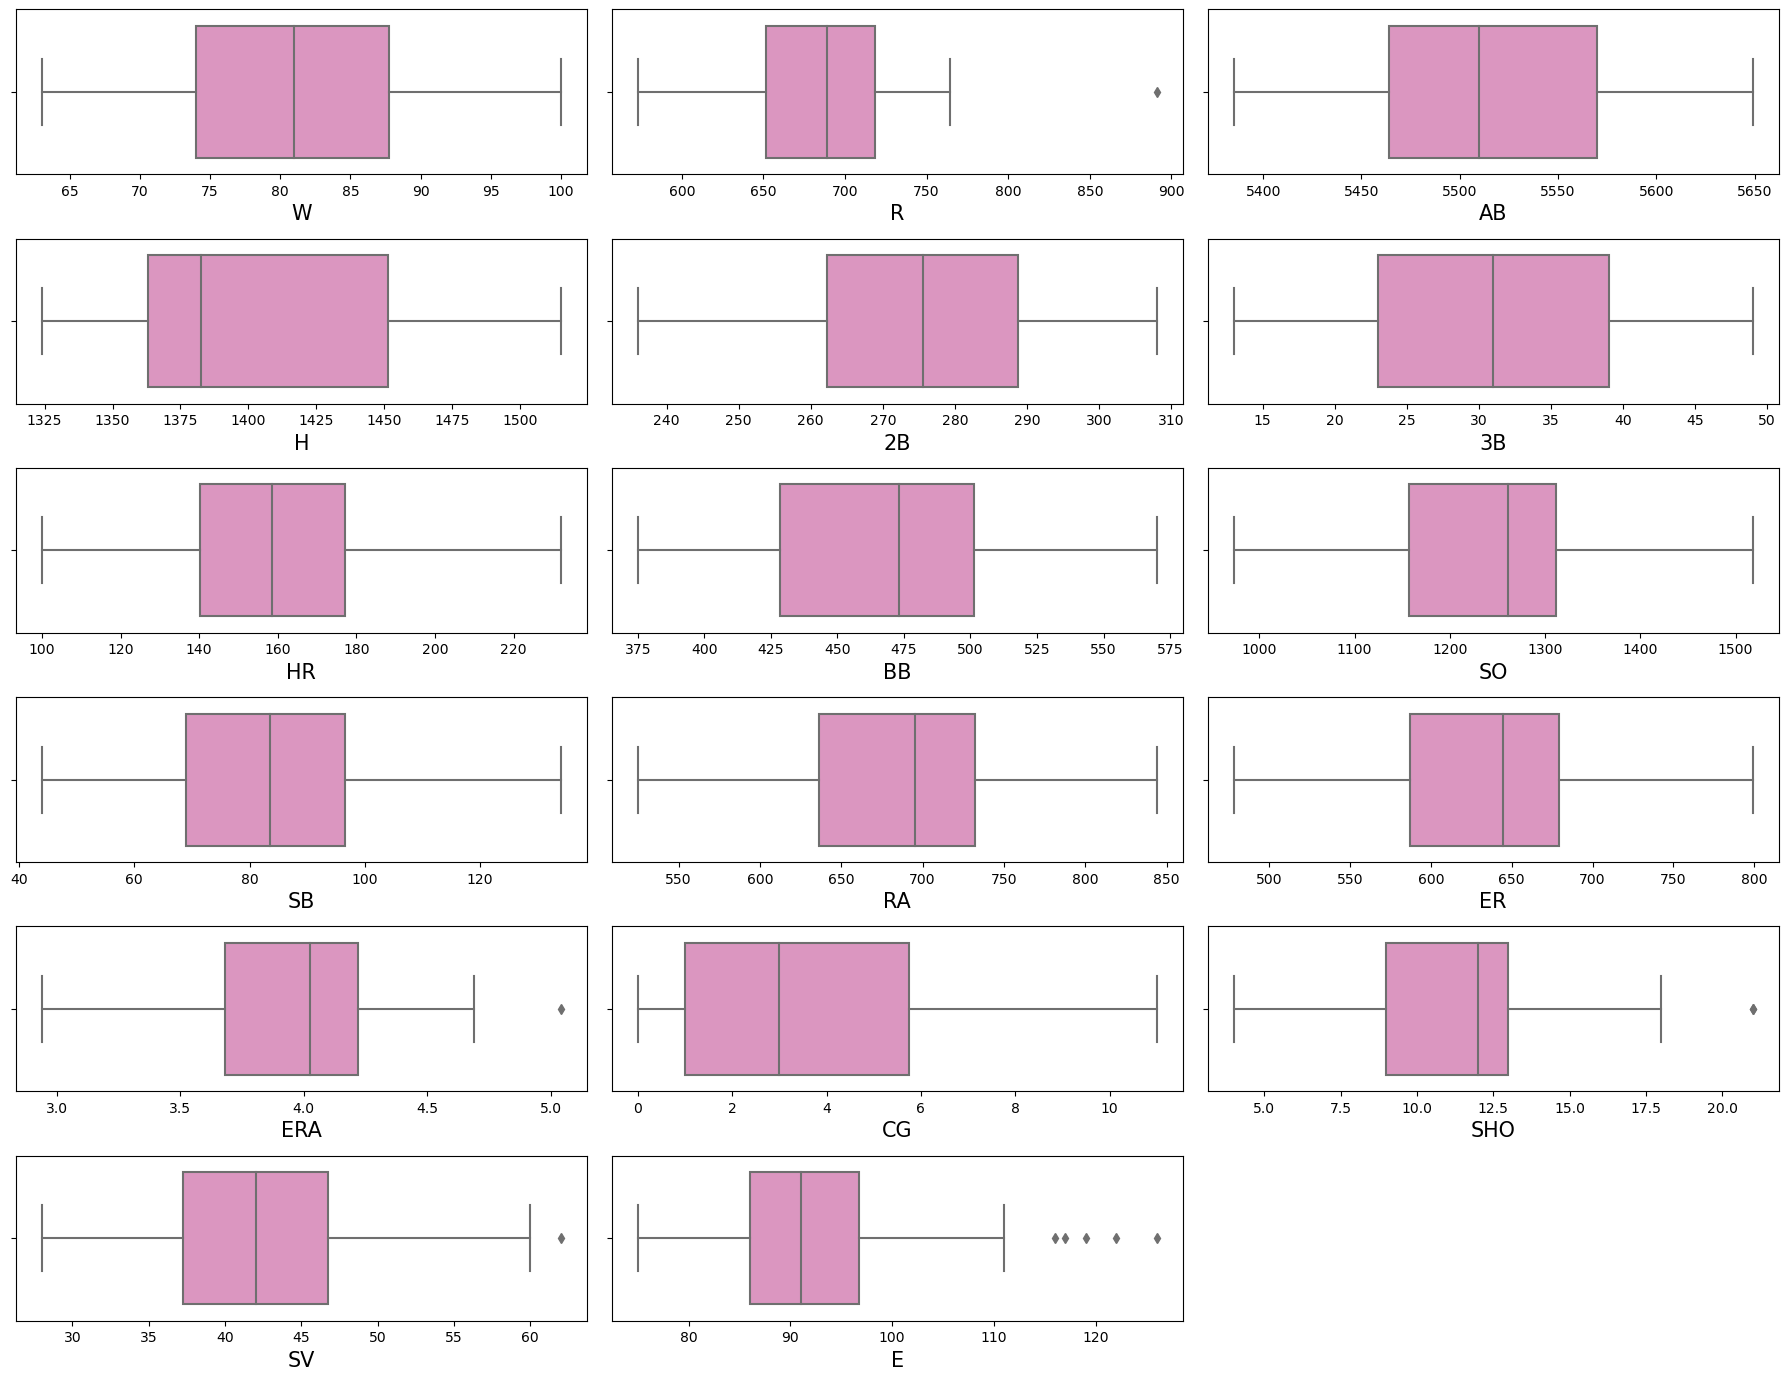

In [16]:
plt.figure(figsize=(18,18),facecolor="White")
plotnumber=1
for col in df:
    if plotnumber<=17:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# NOW WE HAVE PLOTTED VARIOUS GRAPHS AND CAME TO THIS CONCLUSION THAT:-
1) By observing the non graphical and data visualization analysis there are some form of skewness in the given features or data.
 there are some features where mean is greater than median which gives rise to the data being skewed to the right and vica versa.
 
 
2) we have detected some outliers which are present in the data just above this we have drawn a boxplot to etermine some outliers and we will treat them accordingly.


3) by using the heatmap we have also detected the correlation between the features which we will treat after the outliers and skewness is treated.

# Removing the outliers

In [18]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [19]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]
df = df_new.copy()
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [20]:
df.shape

(29, 17)

In [58]:
## we have deleted 1 row due to the outliers detected by applying z score method above

# REMOVING THE SKEWNESS:-

In [22]:
# Checking the skewness in the data
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

## HERE WE HAVE CERTAIN FEATURES LIKE "H","CG","SV","E" WHICH HAVE VERY HIGH SKEWNESS SO WE WILL USE CUBEROOT METHOD TO CONTROL IT.

In [23]:
df["H"]=np.cbrt(df["H"])

In [24]:
df["SV"]=np.cbrt(df["SV"])

In [25]:
df["E"]=np.cbrt(df["E"])

In [26]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.280963
E      0.671748
dtype: float64

In [27]:
df["H"]=np.cbrt(df["H"])

In [28]:
df["E"]=np.cbrt(df["E"])

In [29]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.743531
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.280963
E      0.613073
dtype: float64

## TREATMENT OF MULTICOLLINEARITY ISSUES AFTER SCALING THE FEATURES AND SEPERATING THEM

## SEPERATING FEATURES AND LABELS

In [30]:
# Separating the independent and target variables into x and y 
x = df.drop("W", axis=1)
y = df['W']


## USING SCALING METHOD 

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
X = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

## Treating the multicollinearity issues

In [32]:
X.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
R,1.000000,0.438022,0.432387,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.074712,0.041358
AB,0.438022,1.000000,0.770055,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.132717,0.321269
H,0.432387,0.770055,1.000000,0.527433,0.579998,-0.219151,-0.221834,-0.373148,0.419950,0.243748,0.280025,0.255951,0.092762,-0.137760,-0.093775,-0.012739
2B,0.469293,0.490752,0.527433,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.254589,0.146754
3B,0.134204,0.445604,0.579998,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.244604,0.099561
HR,0.586894,-0.064653,-0.219151,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.089909,-0.183185
BB,0.258450,-0.137850,-0.221834,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.200162,-0.052153
SO,0.081158,-0.111243,-0.373148,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.110550,0.151682
SB,0.075323,0.373674,0.419950,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.189903,0.078479
RA,-0.013858,0.315499,0.243748,-0.215196,0.312750,-0.092586,-0.425381,-0.140570,0.134315,1.000000,0.991286,0.986781,-0.005288,-0.641579,-0.635175,0.207291


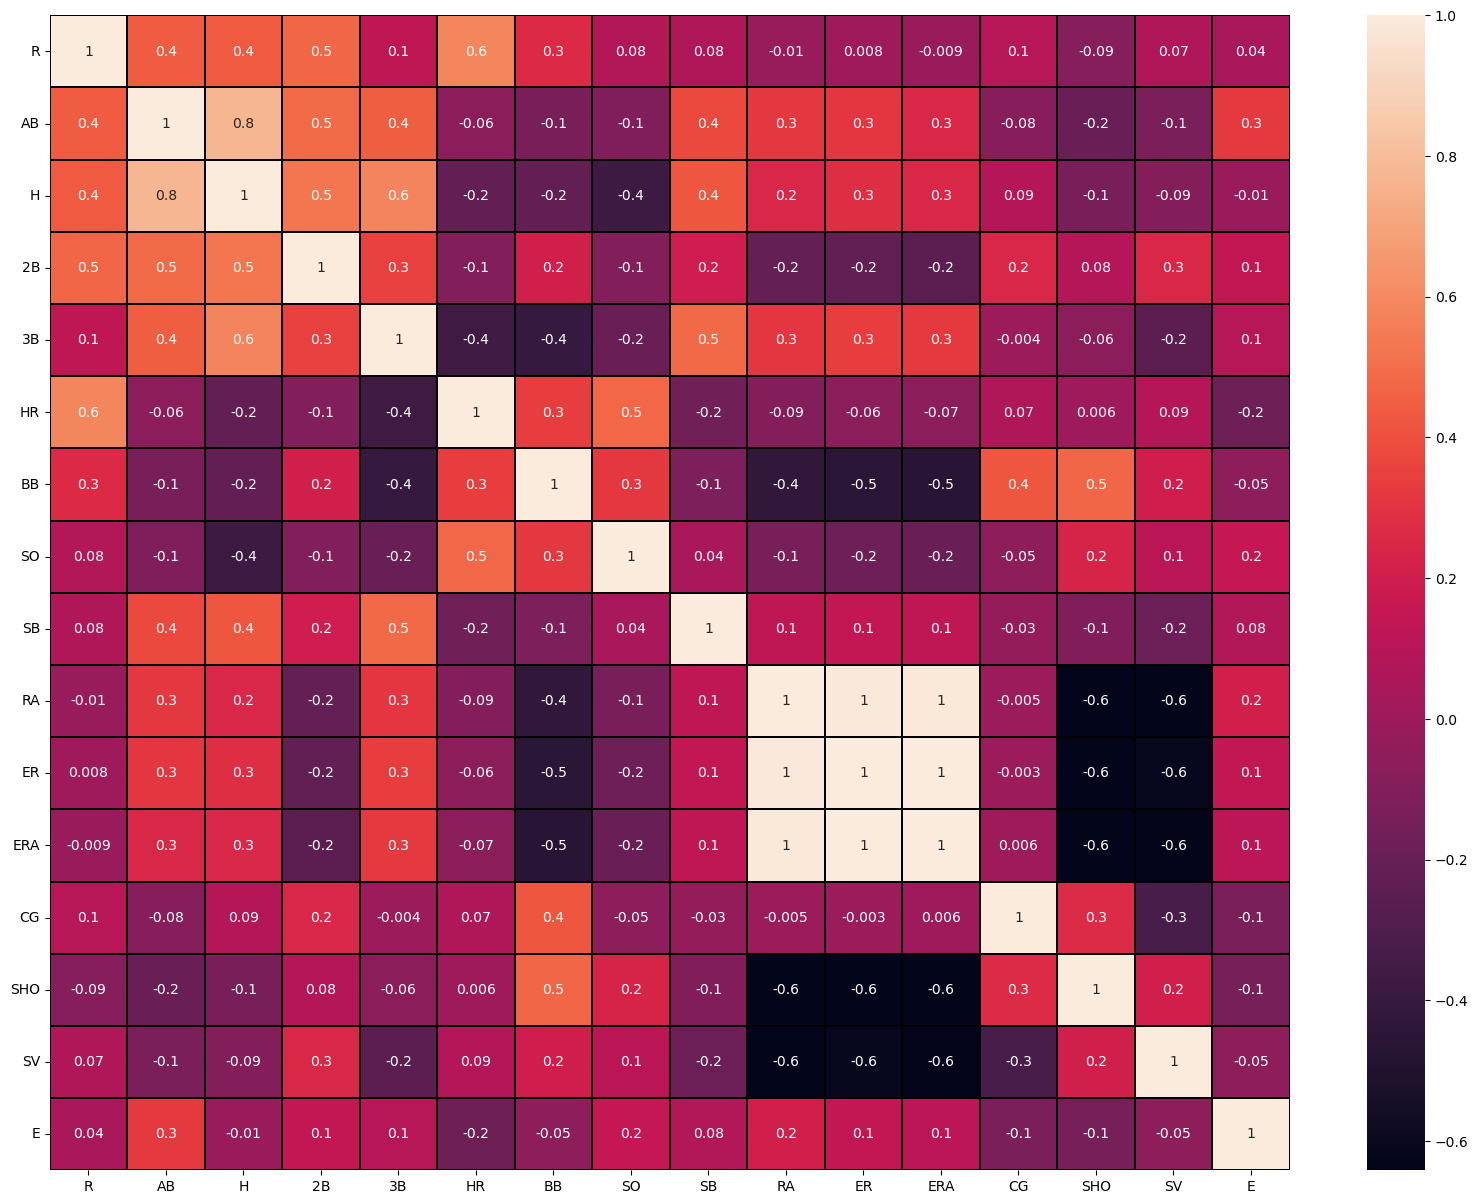

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(), linewidth=0.1,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF values
0,R,7.140450
1,AB,19.951727
2,H,10.588196
3,2B,3.749563
4,3B,3.304906
5,HR,8.578982
6,BB,3.346613
7,SO,2.765851
8,SB,2.067790
9,RA,200.907302


### Here we can find the features ER, 
ERA, RA,ER,
AB, and H have VIF value greater than 10 which means they have high correlation with other features.

In [35]:
# Dropping the columns with high multicollinearity
X = X.drop(['ER'], axis=1) 

In [36]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF values
0,R,6.413665
1,AB,7.911414
2,H,9.672131
3,2B,3.397899
4,3B,3.249057
5,HR,7.541098
6,BB,3.346553
7,SO,2.741556
8,SB,1.869766
9,RA,146.216258


### Vif values which are greater than 10 are highly correlated so we will drop the highest valued feature and then will compare the values again 

In [37]:
X = X.drop(['RA'], axis=1) 

In [38]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF values
0,R,6.401212
1,AB,5.044428
2,H,8.354138
3,2B,3.393100
4,3B,3.209843
5,HR,6.320906
6,BB,3.023309
7,SO,2.125879
8,SB,1.816258
9,ERA,4.669049


## After dropping the highly correlated features all the values of vif has become less than 10 so therefore we have treated the multicollinearity issues by dropping the two features which resulted in multicollinearity issues which would have further overfitted our model.

## MODELLING :-

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [40]:
## FINDING THE BEST RANDOM STATE:-
def find_best_random_state(model, X, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.9096 at random_state 104


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (20, 16)
x_test shape:   (9, 16)
y_train shape:  (20,)
y_test shape:   (9,)


In [48]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


LR coef_        : [ 1.43142827e-01 -3.09538195e-02  3.30651568e+01 -1.73792669e-01
  1.60793403e-01 -4.00454391e-02 -3.43032598e-02 -2.18827722e-03
 -1.79377394e-02  2.26989915e-01  3.03058891e-02 -5.22065638e+01
  1.24291968e+00  1.39216586e-01  2.98091264e+01 -1.27003453e+01]

LR intercept_ : 90.7583842195654
LR score train  : 0.9511541833299142
LR score test   : 0.9095966265034877
********** E R R O R **********
Mean squared error: 11.9533
Root Mean squared error: 3.4574
Cross-validation results (R2): [  0.9485535    0.39138054 -19.51491166  -6.97911949   0.47099152
   0.69827864   0.71270132  -1.19825376   0.26386145  -1.75833503]
Average R2: -2.5965
R2_Score(test): 0.9096


In [43]:
%%time
rfr = RandomForestRegressor()
parameters = {'n_estimators':[100, 600, 1000], # Number of trees in the forest
             'max_features': ["auto"],
             'max_depth':[None, 40, 50, 60], # Maximum depth of the trees
             'min_samples_split': [5, 7, 9], # Minimum number of samples required to split an internal node
             'min_samples_leaf': [7, 10, 12], # Minimum number of samples required to be at a leaf node
             'criterion': ['mse'],
             'bootstrap': [True, False]}  # Whether to use bootstrap samples when building trees

grid_cv = GridSearchCV(estimator = rfr, param_grid=parameters, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)

Wall time: 57.2 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['mse'],
                         'max_depth': [None, 40, 50, 60],
                         'max_features': ['auto'],
                         'min_samples_leaf': [7, 10, 12],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [100, 600, 1000]})

In [45]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=60,
                      min_samples_leaf=7, min_samples_split=9)

In [49]:
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }


Best parameters : {'bootstrap': False, 'criterion': 'mse', 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 100}
Best score : -0.048447878429274116
Best Estimator:  RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=60,
                      min_samples_leaf=7, min_samples_split=9)
********** E R R O R **********
Mean squared error: 86.8804
Root Mean squared error: 9.3210
Cross-validation results (R2): -0.048447878429274116
Average R2: -0.0484
R2_Score(test): 0.3429


## Decision Tree Regressor

In [50]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


********** E R R O R **********
Mean squared error: 87.5556
Root Mean squared error: 9.3571
Cross-validation results (R2): [ -1.74431818 -10.34210526   0.13090757   0.30163934   0.47523585]
Average R2: -2.2357
R2_Score(test): 0.3378


## KNeighbours Regressor

In [51]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }



********** E R R O R **********
Mean squared error: 64.3467
Root Mean squared error: 8.0216
Cross-validation results (R2): [-0.65572727 -2.62052632  0.37716437  0.25554098  0.78667453]
Average R2: -0.3714
R2_Score(test): 0.5133


## LASSO MODEL 

In [52]:
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

********** E R R O R **********
Mean squared error: 23.2798
Root Mean squared error: 4.8249
Cross-validation results (R2): [ 0.30733231 -1.4950466   0.4677159   0.78154914  0.47183666]
Average R2: 0.1067
R2_Score(test): 0.8239


## RIDGE MODEL

In [53]:
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

********** E R R O R **********
Mean squared error: 23.5943
Root Mean squared error: 4.8574
Cross-validation results (R2): [ 0.43406896 -1.0508634   0.48920566  0.81005841 -0.57827225]
Average R2: 0.0208
R2_Score(test): 0.8216


# HYPERPARAMETER TUNING 

In [54]:
random_state

104

In [55]:
model = Lasso()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [56]:
%%time
# Lasso Regression
param_grid = {'alpha': [1.0,.05,.4,2], 
              'fit_intercept':[True, False], 
              'max_iter': [1000, 1200, 1500],
              'positive': [False,True],
              'random_state': [1,10,20,random_state],
              'selection':['cyclic','random'],
              'tol': [0.0001, 0.00001, 0.000001]}

# Build the model 
model = Lasso()

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

Wall time: 5.12 s


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 1200, 1500],
                         'positive': [False, True],
                         'random_state': [1, 10, 20, 104],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [57]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for Lasso model:")
best_params

Best Parameters for Lasso model:


{'alpha': 0.05,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': True,
 'random_state': 20,
 'selection': 'random',
 'tol': 0.0001}

In [58]:
best_model

Lasso(alpha=0.05, positive=True, random_state=20, selection='random')

# FINAL MODEL

In [68]:
# Create the model with the best parameters
best_model = Lasso(alpha = 0.4, fit_intercept = True, max_iter = 1000, positive = False, random_state = 1, selection = 'cyclic', tol = 0.0001)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.3f}%")

Maximum R2 score: 80.056%


In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/baseball_model.pkl")

In [ ]:
# Lets load the saved model and get the predictions
model = joblib.load("models/baseball_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T